# Linear and Discrete Models (Topics 1, 2)

Paula Chiaramonte

### Description of the Problem

We want to design a balanced Diet Plan based only on meals of Chipotle for a man. To satisfied this *balance* in the diet plan, there are some requirements in terms of the intake of macronutrients, vitamins and minerals that a person needs to reach in order to be considered a *healthy* and *good* diet intake. 

So the goal of this problem is to select the meals and the number of them that a man of 30 years, that weights 80 kg and has a height equal to 180cm, needs to buy in order to fulfill the macronutrients and calories intake. But this person wants to spend the less amount of money possible, so we need to minimize the cost of this daily purchases in Chipotle. 

### Formulation of problem as linear programming

We can formulate this problem in linear programming model if we define it as the following:

**Variables:** The variables need to be the number of servings for each meal provided in the Chipotle menu:

$X_{i}$ = number of servings of the meal $i$

**Objective Function**: we need to minimize the cost of all the meals bought, so the objective function is:

$ min \sum_{i = 1}^{N} X_{i}*Cost_{i}$ , 

 where $Cost_{i}$ is the cost of one serving of the meal $i$

**Constraint**: the constraints are the limits of amount of calories, macronutrients, vitamins and minerals of a balanced daily intake of a person. So we need to define a constraint for each macronutrient, vitamin and mineral:

*Contraint Calories*: 

*minimum Calories* $ \leq \sum_{i = 1}^{N} X_{i}*Calories_{i} \leq$ *maximum Calores

*Constraint nutrients & vitamins*: 

Min Constraint($a_{j}) \leq \sum_{i = 1}^{N} X_{i}*a_{i,j} \leq$ Max Constraint($a_{j}$)

&ensp; for every nutrient/vitamin/mineral j in the meal i


We need to define the numbers for the constraints. Assuming that this man wants to mantain weight, we are going to use a [Macro Nutrients Calculator]( https://www.calculator.net/macro-calculator.html) and the [Recommended daily intake of vitamins and minerals]( https://www.lenntech.com/recommended-daily-intake.html) values recommended for a 30 year old man that has a weight equal to 80kg, a height equal to 180cm and exercises moderately (4-5 times a week)

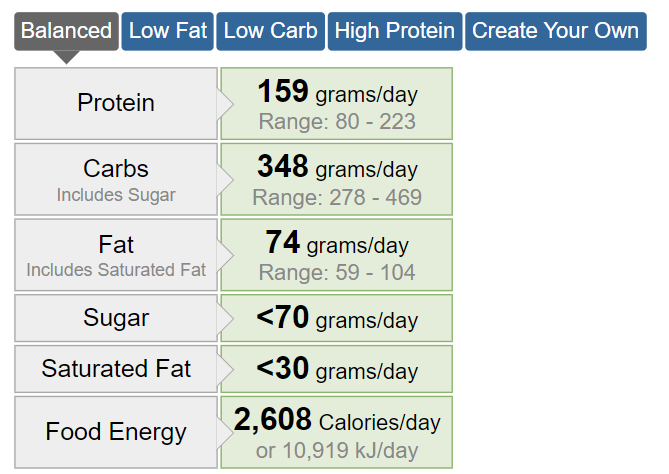

We need the *Parameters* to initialize the model that is going to solve the problem. The parameters are the minimum amount and the maximum amount of calories, nutrients, vitamins and minerals. These parameters are going to be used to write the constraints of the problem.  

In [1]:
infinity = float('inf')

constraints_min = {
    'calories': 2600,
    'fats': 74,
    'saturates':0,
    'carbohydrate': 340, 
    'sugars': 25,
    'protein': 160,
    'salt': 2.4, 
    'vitamin_A': 0.0006,
    'vitamin_C': 0.07,
    'calcium':1,
    'iron':0.015,
}

constraints_max = {
    'calories': 3000,
    'fats': 105,
    'saturates':30,
    'carbohydrate': 470, 
    'sugars': 70,
    'protein': 223,
    'salt': infinity, 
    'vitamin_A': infinity,
    'vitamin_C': infinity,
    'calcium':infinity,
    'iron':infinity,
    
}

We need all the information (nutritional facts and prices) of each meal in order to formulate the model that will solve the linear programming problem. The data we are going to use in this problem is shown here, and is obtained from [Chipotle's Nutrition Calculator](https://www.chipotle.com/nutrition-calculator) and the prices are obtained from the [Chipotle Mexican Grill Menu Prices](https://realmenuprices.com/chipotle-mexican-grill-menu-prices/) page. 

In [2]:
import pandas as pd
import numpy as np

data = pd.read_excel("data_diet_chipotle.xlsx", index = True)
df = data.set_index(data.meal, drop = True)
df = df.drop(['meal'], axis = 1)
df

,calories,fats,saturates,carbohydrate,sugars,protein,salt,vitamin_A,vitamin_C,calcium,iron,price,type
meal,,,,,,,,,,,,,
Barbacoa Burrito,460,16.0,5.5,46,1.0,31,1.180,0.000036,0.00000,0.22,0.00450,7.50,Burrito
Carnitas Burrito,480,17.0,5.5,45,0.0,34,1.210,0.000012,0.00000,0.22,0.00345,6.95,Burrito
Chicken Burrito,480,16.0,5.0,45,1.0,39,1.040,0.000060,0.00150,0.22,0.00345,6.50,Burrito
Sofritas Burrito,445,20.0,2.5,55,5.0,15,1.245,0.000102,0.01725,0.37,0.00480,6.50,Burrito
Steak Burrito,480,16.0,5.0,46,1.0,37,0.990,0.000012,0.00000,0.22,0.00450,7.50,Burrito
Barbacoa Burrito Bowl,170,7.0,2.5,2,1.0,24,0.510,0.000036,0.00000,0.02,0.00225,7.50,Bowl
Carnitas Burrito Bowl,190,8.0,2.5,1,0.0,27,0.540,0.000012,0.00000,0.02,0.00120,6.95,Bowl
Chicken Burrito Bowl,190,7.0,2.0,1,1.0,32,0.370,0.000060,0.00150,0.02,0.00120,6.50,Bowl
Sofritas Burrito Bowl,145,10.0,1.5,9,5.0,8,0.555,0.000102,0.01725,0.17,0.00255,6.50,Bowl


The Sets that we need to initialize in the model are the Sets for all the names of the Meals, and the Set for all the name of the constraints (calories, macronutrients, vitamins and minerals names). 

In [3]:
meals = list(data.meal) #Set of Names of Meals
print("Set of Name of Meals: \n" + str(meals) + "\n")

columns_df = list(df.columns[:-2])
print("Set of Name of Constraints: \n" + str(columns_df))

Set of Name of Meals: 
['Barbacoa Burrito', 'Carnitas Burrito', 'Chicken Burrito', 'Sofritas Burrito', 'Steak Burrito', 'Barbacoa Burrito Bowl', 'Carnitas Burrito Bowl', 'Chicken Burrito Bowl', 'Sofritas Burrito Bowl', 'Steak Burrito Bowl', 'Keto Salad Bowl', 'Cheese Quesadilla', 'Steak Quesadilla', 'Chips', 'Chips & Guacamole', 'Chips & Salsa', 'Barbacoa Tacos', 'Chicken Tacos', 'Steak Tacos', 'Margarita', 'Beer', 'Soda', 'Whole30  Bowl', 'Paleo Salad Bowl', 'Vegan Bowl', 'High Protein Bowl', 'Tortilla Chips', 'Chips + Guacamole', 'Chips + Fresh Tomato Salsa', 'Peach Orange Juice', 'Apple Juice', 'Clementine Juice', 'Blackberry Juice']

Set of Name of Constraints: 
['calories', 'fats', 'saturates', 'carbohydrate', 'sugars', 'protein', 'salt', 'vitamin_A', 'vitamin_C', 'calcium', 'iron']


### Implementation of the Model in Pyomo

In [4]:
from pyomo.environ import * 

model = ConcreteModel()

# Sets
model.meals = Set(initialize = meals, doc = 'Name of Meals')
model.N = Set(initialize = columns_df, doc = 'Name of nutrients')

# Parameters
model.nutrients_min = Param(model.N, initialize = constraints_min, doc = 'Minimum Nutrients')
model.nutrients_max = Param(model.N, initialize = constraints_max, doc = 'Maximum Nutrients')

# Variables
model.x = Var(model.meals, doc = 'Number of servings per Meal', within = NonNegativeReals)

#Objective Function

def rule_expr(model):
    return sum(model.x[i]*df.loc[i].price for i in model.meals)

model.obj = Objective(rule = rule_expr, sense = minimize)

#Constraints

model.min_nutrients = ConstraintList() # lower constraints
model.max_nutrients = ConstraintList() # upper constraints

for nut in columns_df: #goes through all the nutrients/vitamins/minerals
    model.min_nutrients.add(sum(model.x[i]*df.loc[i][str(nut)] for i in model.meals) >= model.nutrients_min[str(nut)])
    model.max_nutrients.add(sum(model.x[i]*df.loc[i][str(nut)] for i in model.meals) <= model.nutrients_max[str(nut)])

In [5]:
# Define the solver
Solver = SolverFactory('glpk')

# Solve
results = Solver.solve(model)

model.dual = Suffix(direction=Suffix.IMPORT) #sensitivities

Results = Solver.solve(model)

# display(model)

### Interpretation of the Solution

In [6]:
print("Optimal Solution \n")

optimal_values = [value(model.x[key]) for key in model.x]
results = pd.Series(optimal_values, index = meals)
print(results[results>0])

objective_results = [value(model.obj[key]) for key in model.obj]
print("\nTotal cost of meals: " + str(objective_results[0]))

cons = [i for i in constraints_min.keys()]
constraints_values = [value(model.min_nutrients[key]) for key in model.min_nutrients]
constraints = pd.Series(constraints_values, index = cons)
print("\n" + str(constraints))

Optimal Solution 

Chips & Salsa                 1.301658
High Protein Bowl             1.957538
Chips + Fresh Tomato Salsa    0.615087
Peach Orange Juice            0.216710
Apple Juice                   0.453256
dtype: float64

Total cost of meals: 25.575711611590062

calories        2966.984102
fats             105.000000
saturates         28.241524
carbohydrate     340.000000
sugars            70.000000
protein          160.000000
salt               5.354873
vitamin_A          0.002264
vitamin_C          0.070000
calcium            2.300180
iron               0.091373
dtype: float64


According to the results of the linear programming model, the Diet Plan that minimizes the price of the meals and fulfill all the nutritional constraints consists of:

- 1.3 Chips & Salsa meals
- 1.97 High Protein Bowls 
- 0.61 Chips + Fresh Tomato Salsa meals
- 0.21 Peach Orange Juices
- 0.45 Apple Juices

And these Diet Plan contains:
- calories:        2966.98 
- fats   :          105 grams
- saturates :        28.24 grams
- carbohydrate  :   340 grams
- sugars   :         70 grams
- protein  :        160 grams
- salt      :         5.354 grams
- vitamin_A  :        0.002264 grams
- vitamin_C  :        0.07 grams
- calcium    :        2.30 grams
- iron        :       0.091373 grams

And all these Diet Plan costs: **$25.58**


From the results we can see, that to obtain the minimal possible price, the number of the servings are not integers, but Rational numbers, which means that in real life is impossible (or very hard) to obtain this Diet Plan. 

On the other hand, we can see from the results of the constraints, that to obtain a minimal price, most of the constraints (calories, nutritients, vitamins and minerals) resulted in their upper limit. For example, the calories, fats, saturates and  sugars got their maximum value possible. And contrarly, only two resulted in their lower limit, which were the carbohydrates and the proteins. 

**Sensitivities**

In [7]:
cons_min = list(constraints_min.keys())[-2:] + list(constraints_min.keys())[:-2]
cons_max = list(constraints_max.keys())[:-5]
names_max = ['max ' + str(i) for i in cons_max]
names_min = ['min ' + str(i) for i in cons_min]
names_cons = names_max + names_min

# model.dual.display()
sens_values = [value(model.dual[key]) for key in model.dual]
sensitivities = pd.Series(sens_values, index = names_cons)

print("Constraint Sensitivities: ")
sensitivities

Constraint Sensitivities: 


max calories        0.000000
max fats            0.000000
max saturates       0.000000
max carbohydrate    0.091020
max sugars          0.000000
max protein         0.159122
min calcium         0.000000
min iron            0.000000
min calories        2.666734
min fats            0.000000
min saturates       0.000000
min carbohydrate    0.000000
min sugars         -0.252309
min protein         0.000000
min salt            0.000000
min vitamin_A      -0.064638
min vitamin_C       0.000000
dtype: float64

From the sensitivities we can say that most of the constraints have sensitivity 0, which means that if we add a unit to those constraints it will not affect the total cost of the Diet Plan. But the constraints that do have a sensitivity different from zero are:

- Maximum amount of carbohydrates = 0.0910, which means that if we add a gram to the maximum amount of carbohydrates the total optimized price will increase $0.0910

- Maximum amount of protein = 0.16, which means that we add a gram to the maximum amount of proteins in the requirements, the total optimized price will increase $0.16 

- Minimum amount of Calories = 2.66, which means that if we add a unit to the minimum amount of calores in the nutritional requirements, the total optimized price will increase $2.66

- Minimum amount of Sugars = -0.25, which means that if we add gram to the minimum amount of sugar in the nutritional requirements, the total optimized price will decrease $0.25

- Minimum amount Vitamin A = -0.064, which means that if we add a gram to the minimum amount of Vitamin A in the nutritional requirements, the total optimized price will decrease $0.064


From the sensitivities we can say that:

- The carbohydrates and the proteins are costly Chipotle's meals, because if we increase the necessity of these nutrients the prices will go up. 

- Also we can say that the minimization of calories in Chipotle is costly too, because if we want a Diet Plan with less calories we will need to pay more

- The sugar and the vitamin A are not costly in Chipotle, because if we ask for more sugar and more Vitamin A, the total price will go down. 



### Adding Binary Constraints and Variable 

The man that asked for the Diet Plan based only on Chipotle meals requested more requirements. In his Diet Plan he only wanted one meal for each type of meal. In other words, if there was a taco meal selected, that will be the only type of taco. And this statement applied to all the type of meals (drinks, tacos, bowls, burritos and sides). He also wanted integers numbers in the number of servings per meal, to make the problem more realistic

To achieve this, we need to add another variable to the model. This variable needs to be a *binary* variable, that represents if a Meal is selected or not:

$$y_{i}=\left\{\begin{array}{ll}
1 & \textrm{if the meal $i$ is selected}\\
0 & \textrm{otherwise}
\end{array}\right.$$

To achieve the requirements of only one meal per type of meal, we need to add some constraints:

**New binary constraints**: 


- **If a drink is picked, another drink cannot be picked:**

$y_{i} = 1$ then $y_{j} = 0$ &emsp; for i and j being all the different types of drinks, and $i \neq j$

That is equal to:

&emsp; &emsp; **$y_{j} \leq 1 - y_{i}$**
&emsp; for i and j being all the different types of drinks, and $i \neq j$


- **If a taco is picked, another taco cannot be picked:**

$y_{i} = 1$ then $y_{j} = 0$ &emsp; for i and j being all the different types of tacos, and $i \neq j$

That is equal to:

&emsp; &emsp; **$y_{j} \leq 1 - y_{i}$**
&emsp; for i and j being all the different types of tacos, and $i \neq j$

- **If a bowl is picked, another bowl cannot be picked:**

$y_{i} = 1$ then $y_{j} = 0$ &emsp; for i and j being all the different types of bowls, and $i \neq j$

That is equal to:

&emsp; &emsp; **$y_{j} \leq 1 - y_{i}$**
&emsp; for i and j being all the different types of bowls, and $i \neq j$

- **If a burrito is picked, another burrito cannot be picked:**

$y_{i} = 1$ then $y_{j} = 0$ &emsp; for i and j being all the different types of burritos, and $i \neq j$

That is equal to:

&emsp; &emsp; **$y_{j} \leq 1 - y_{i}$**
&emsp; for i and j being all the different types of burritos, and $i \neq j$

- **If a side is picked, another side meal cannot be picked:**

$y_{i} = 1$ then $y_{j} = 0$ &emsp; for i and j being all the different types of sides, and $i \neq j$

That is equal to:

&emsp; &emsp; **$y_{j} \leq 1 - y_{i}$**
&emsp; for i and j being all the different types of sides, and $i \neq j$


On the other hand, we need to change the $X_{i}$ variable to the domain of Postive Integers, to obtain integers number in each number of servings per meal. 

In [8]:
# For the creation of Sets to identified the different type of meals:
drinks = df[df.type == 'Drink'].index
burritos = df[df.type == 'Burrito'].index
tacos = df[df.type == 'Tacos'].index
bowls = df[df.type == 'Bowl'].index
side = df[df.type == 'Side'].index

In [9]:
model = ConcreteModel()

# Sets
model.meals = Set(initialize = meals, doc = 'Name of Meals')
model.N = Set(initialize = columns_df, doc = 'Name of nutrients')

model.drinks = Set(initialize = drinks, doc ='Name of drinks')
model.burritos = Set(initialize = burritos, doc = 'Name of burritos')
model.tacos = Set(initialize = tacos, doc = 'Name of tacos')
model.bowls = Set(initialize = bowls, doc = 'Name of bowls')
model.side = Set(initialize = side, doc = 'Name of sides')

# Parameters
model.nutrients_min = Param(model.N, initialize = constraints_min, doc = 'Minimum Nutrients')
model.nutrients_max = Param(model.N, initialize = constraints_max, doc = 'Maximum Nutrients')

# Variables
model.x = Var(model.meals ,doc = 'Number of servings per Meal', within = NonNegativeIntegers)
model.y = Var(model.meals,doc = 'Selection of meals', within = Binary)

#Objective Function

def rule_expr(model):
    return sum(model.x[i]*df.loc[i].price for i in model.meals)

model.obj = Objective(rule = rule_expr, sense = minimize)

#Constraints

model.min_nutrients = ConstraintList()
model.max_nutrients = ConstraintList()

for nut in columns_df:
    model.min_nutrients.add(sum(model.x[i]*df.loc[i][str(nut)] for i in model.meals) >= model.nutrients_min[str(nut)])
    model.max_nutrients.add(sum(model.x[i]*df.loc[i][str(nut)] for i in model.meals) <= model.nutrients_max[str(nut)])

#Binary constraints

# To associate the x variables with their corresponding binary variable
model.binary_relation = ConstraintList()
for i in model.meals:
    model.binary_relation.add(model.x[i] <= df.loc[i].price*model.y[i])

# Drinks Constraints    
model.drinks_cons = ConstraintList()
for drink in model.drinks:
    for i in model.drinks:
        if drink!= i:
            model.drinks_cons.add(model.y[drink] <= 1 - model.y[i])

# Bowls Constraints
model.bowls_cons = ConstraintList()
for bowl in model.bowls:
    for i in model.bowls:
        if bowl!= i:
            model.bowls_cons.add(model.y[bowl] <= 1 - model.y[i])

# Burritos Constraints
model.burrito_cons = ConstraintList()
for burrito in model.burritos:
    for i in model.burritos:
        if burrito !=i:
            model.burrito_cons.add(model.y[burrito] <= 1 - model.y[i])

# Tacos
model.tacos_cons = ConstraintList()
for tacos in model.tacos:
    for i in model.tacos:
        if tacos !=i:
            model.tacos_cons.add(model.y[tacos] <= 1 - model.y[i])
            
# Sides
model.sides_cons = ConstraintList()
for sides in model.side:
    for i in model.side:
        if sides != i:
            model.sides_cons.add(model.y[sides] <= 1 - model.y[i])


In [10]:
# Define the solver
Solver = SolverFactory('glpk')

# Solve
results = Solver.solve(model)

model.dual = Suffix(direction=Suffix.IMPORT) #sensitivities

Results = Solver.solve(model)


In [11]:
print("Optimal Solution \n")

optimal_values = [value(model.x[key]) for key in model.x]
results = pd.Series(optimal_values, index = meals)
print(results[results>0])

objective_results = [value(model.obj[key]) for key in model.obj]
print("\nTotal cost of meals: " + str(objective_results[0]))

cons = [i for i in constraints_min.keys()]
constraints_values = [value(model.min_nutrients[key]) for key in model.min_nutrients]
constraints = pd.Series(constraints_values, index = cons)
print("\n" + str(constraints))

Optimal Solution 

Chicken Burrito     3.0
Vegan Bowl          2.0
Tortilla Chips      1.0
Clementine Juice    1.0
dtype: float64

Total cost of meals: 35.85

calories        2920.000000
fats              99.000000
saturates         21.500000
carbohydrate     352.000000
sugars            70.000000
protein          162.000000
salt               6.840000
vitamin_A          0.001242
vitamin_C          0.087100
calcium            2.760000
iron               0.091260
dtype: float64


According to the results of the discrete model, the Diet Plan that minimizes the price of the meals and fulfills all the nutritional constraints consists of:

- 3 Chicken Burritos
- 2 Vegan Bowls
- 1 Tortilla Chip
- 1 Clementine Juice

And these Diet Plan contains:
- calories:        2920
- fats   :          99 grams
- saturates :        21.5 grams
- carbohydrate  :   340 grams
- sugars   :         70 grams
- protein  :        162 grams
- salt      :         6.84 grams
- vitamin_A  :        0.0012 grams
- vitamin_C  :        0.087 grams
- calcium    :        2.76 grams
- iron        :       0.0912 grams

And all these Diet Plan costs: **$35.85**

With a discrete model we can obtain more realistic results, but by using this type of model the optimal price increases. But also the constraints numbers (calories, nutrients, vitamins and minerals) are more centered in their constrained limits. Also we can see that the extras requirements from the man are costly, because if we select only a meal of its type increase the value (and we use Integers variables instead of rational variables) the optimal value increases. 

In my opinion, it will be more efficiently and realitisc to use a Discrete Model in this type of problems, because can obtain more attainable solutions. 
